<AxesSubplot:xlabel='age', ylabel='Count'>

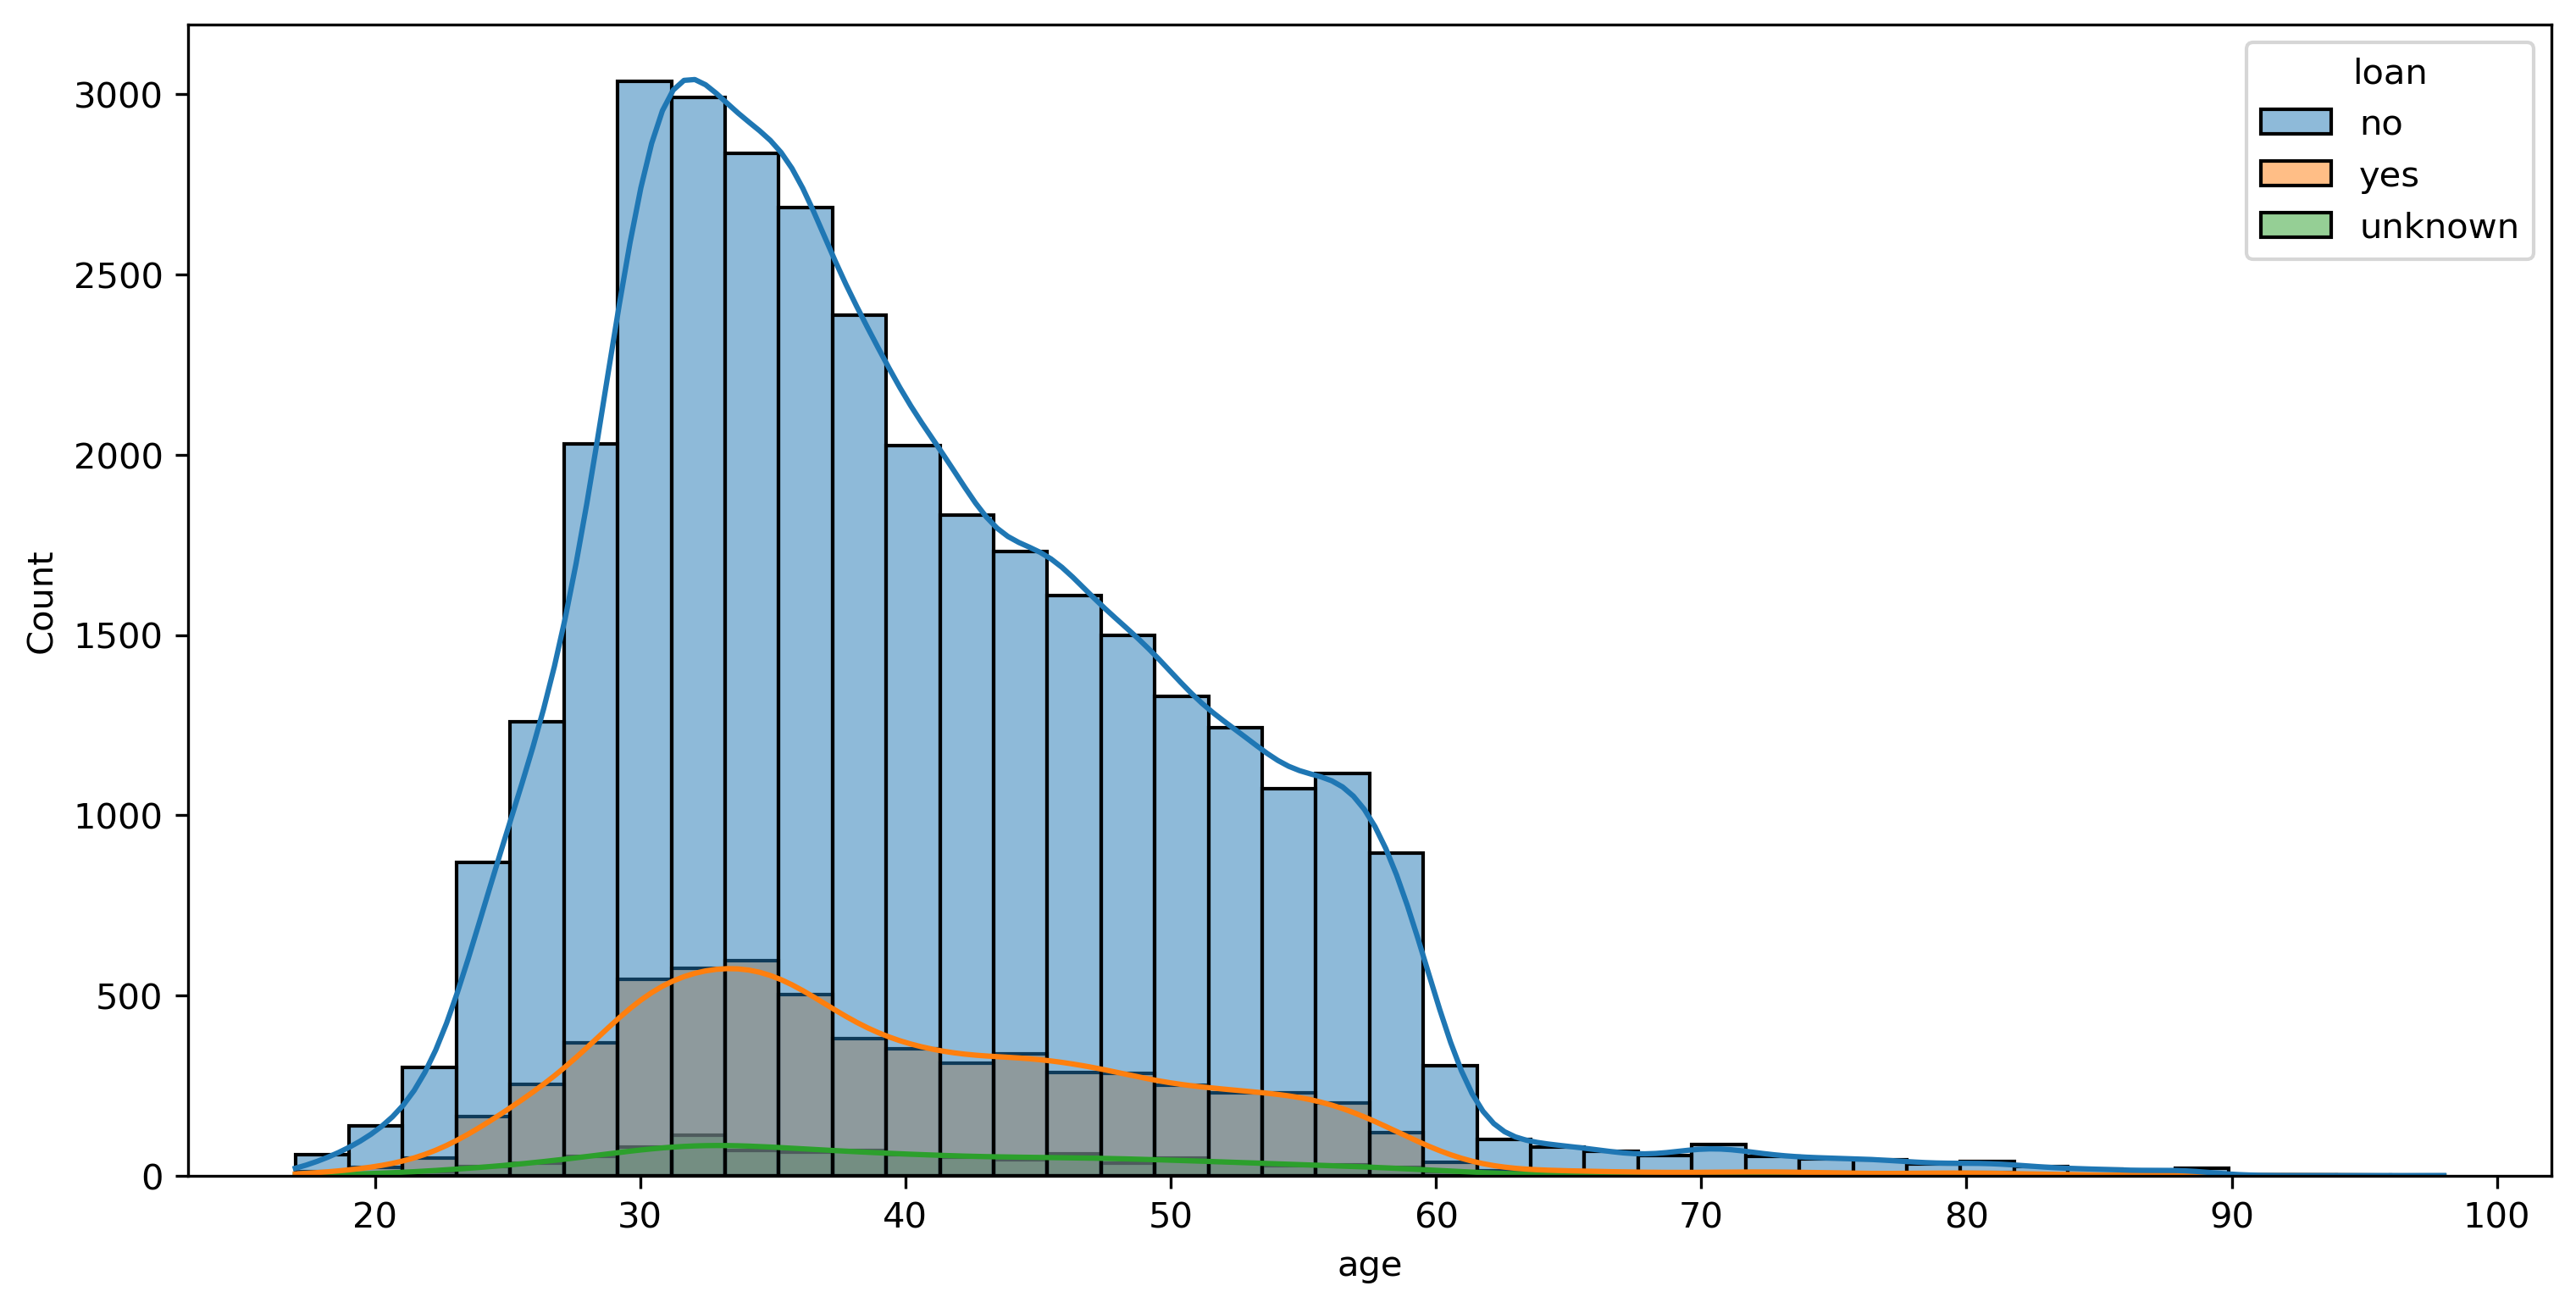

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bank-full.csv')
plt.figure(figsize=(12,6),dpi=300)
sns.histplot(data=df,x='age',bins=40,kde=True,hue='loan')

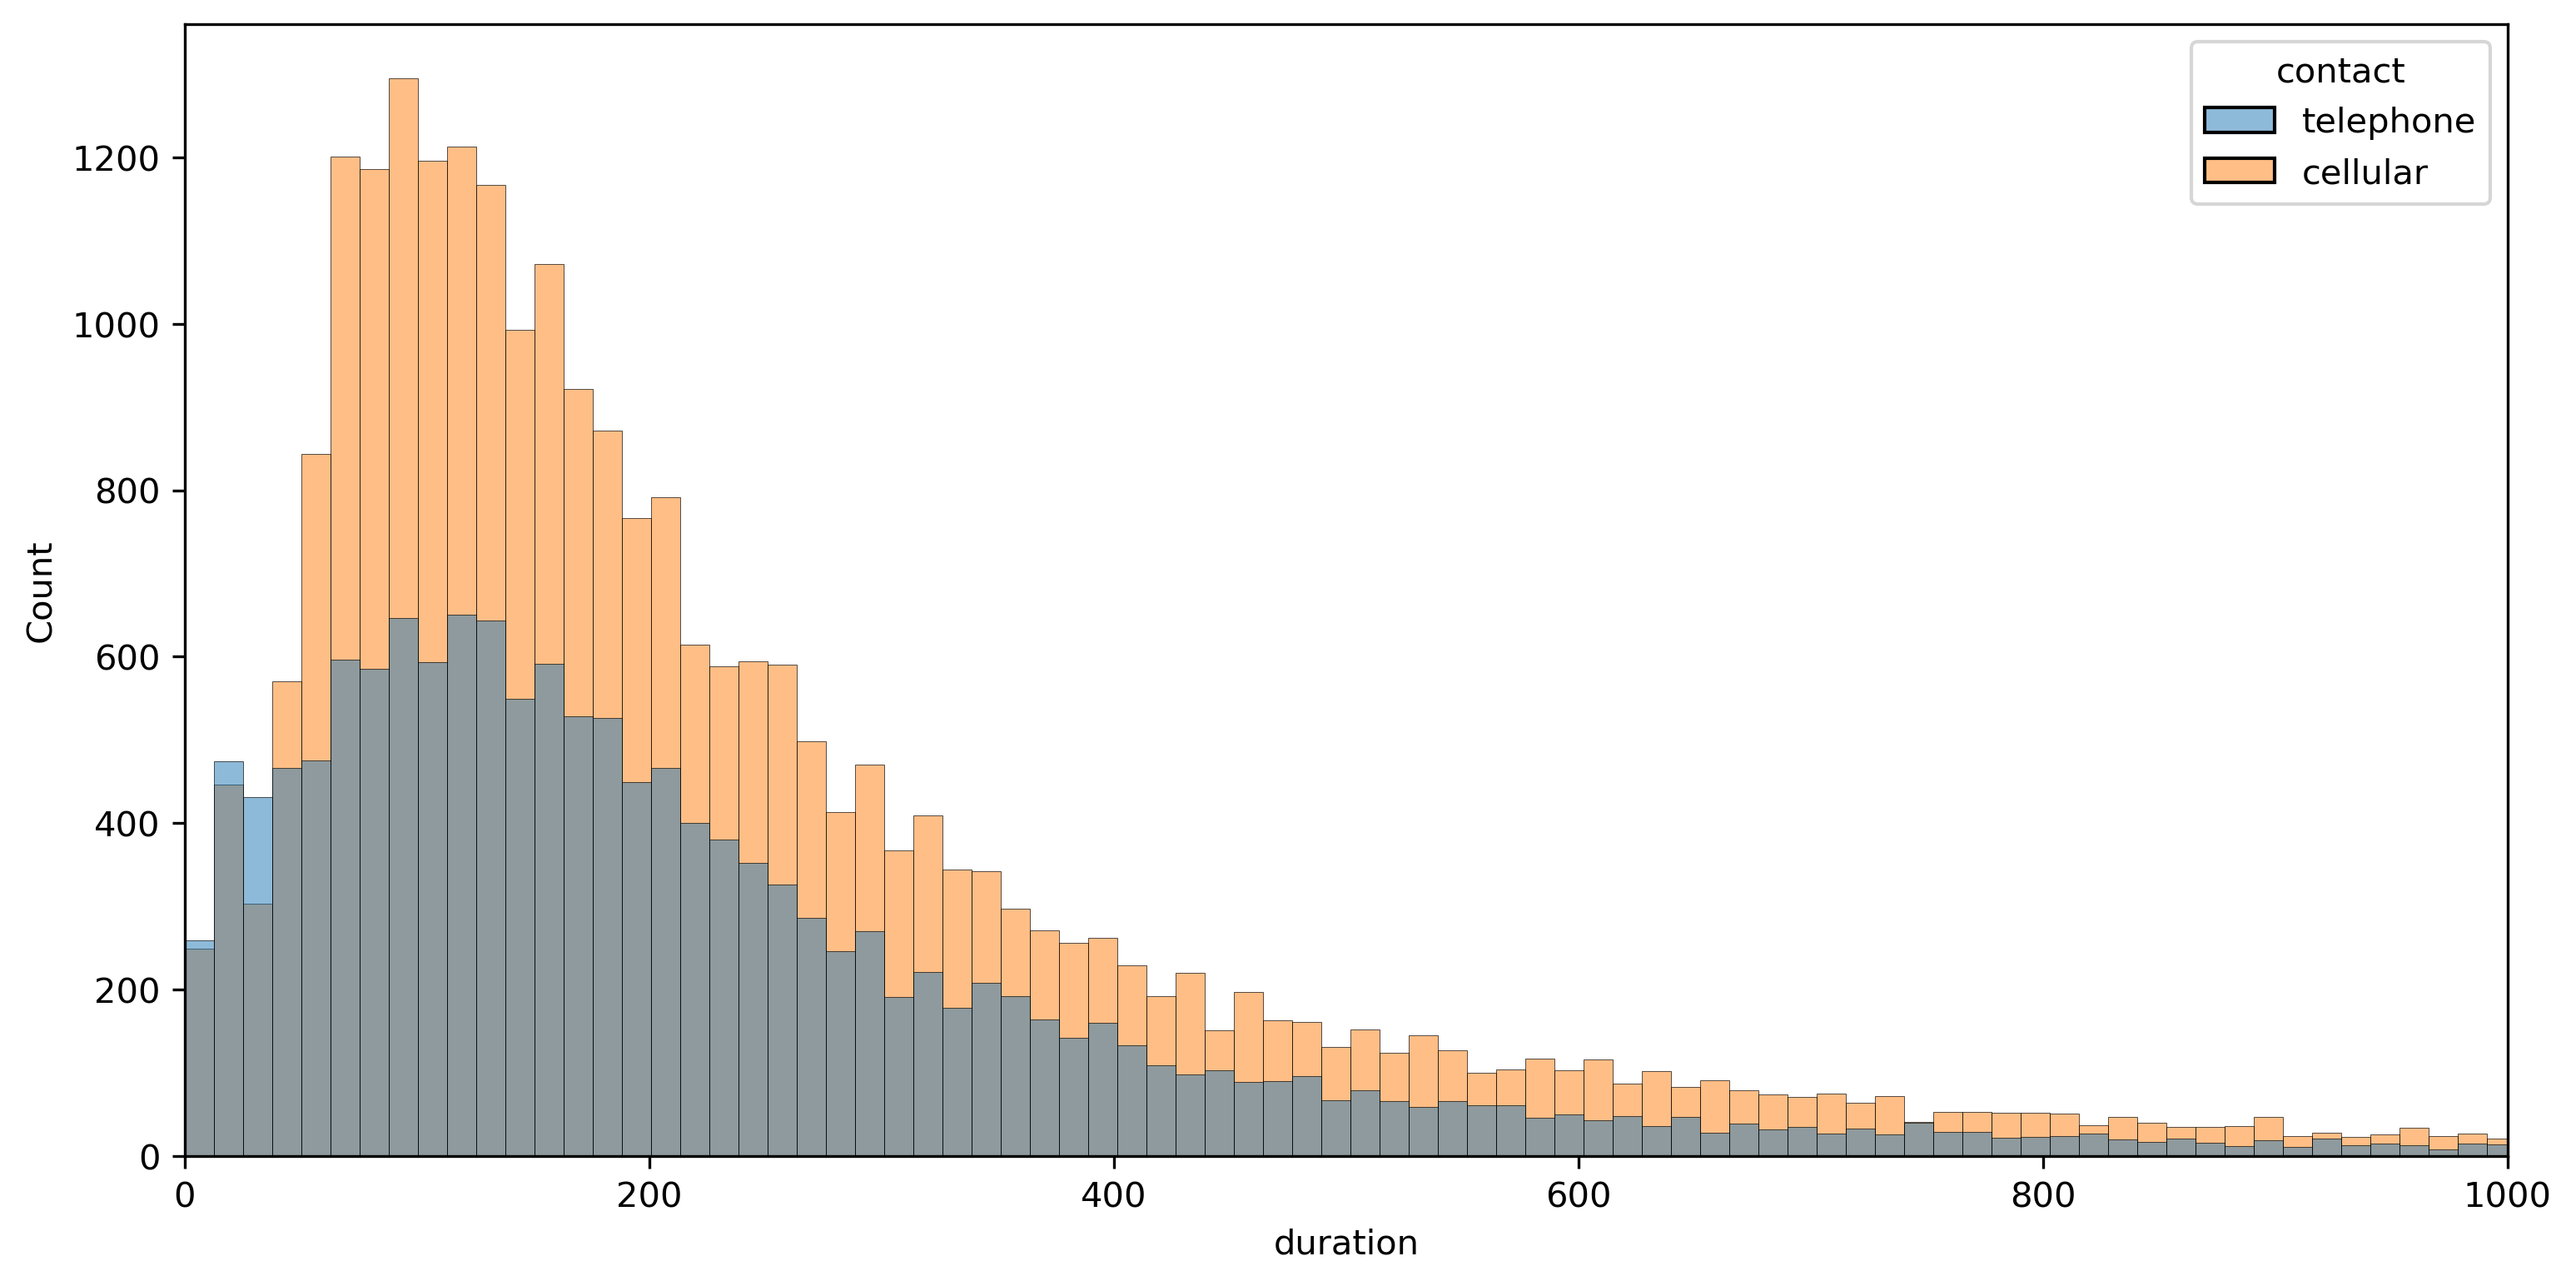

In [15]:
plt.figure(figsize=(12,6),dpi=300)
sns.histplot(data=df,x='duration',hue='contact')
plt.xlim(0,1000);

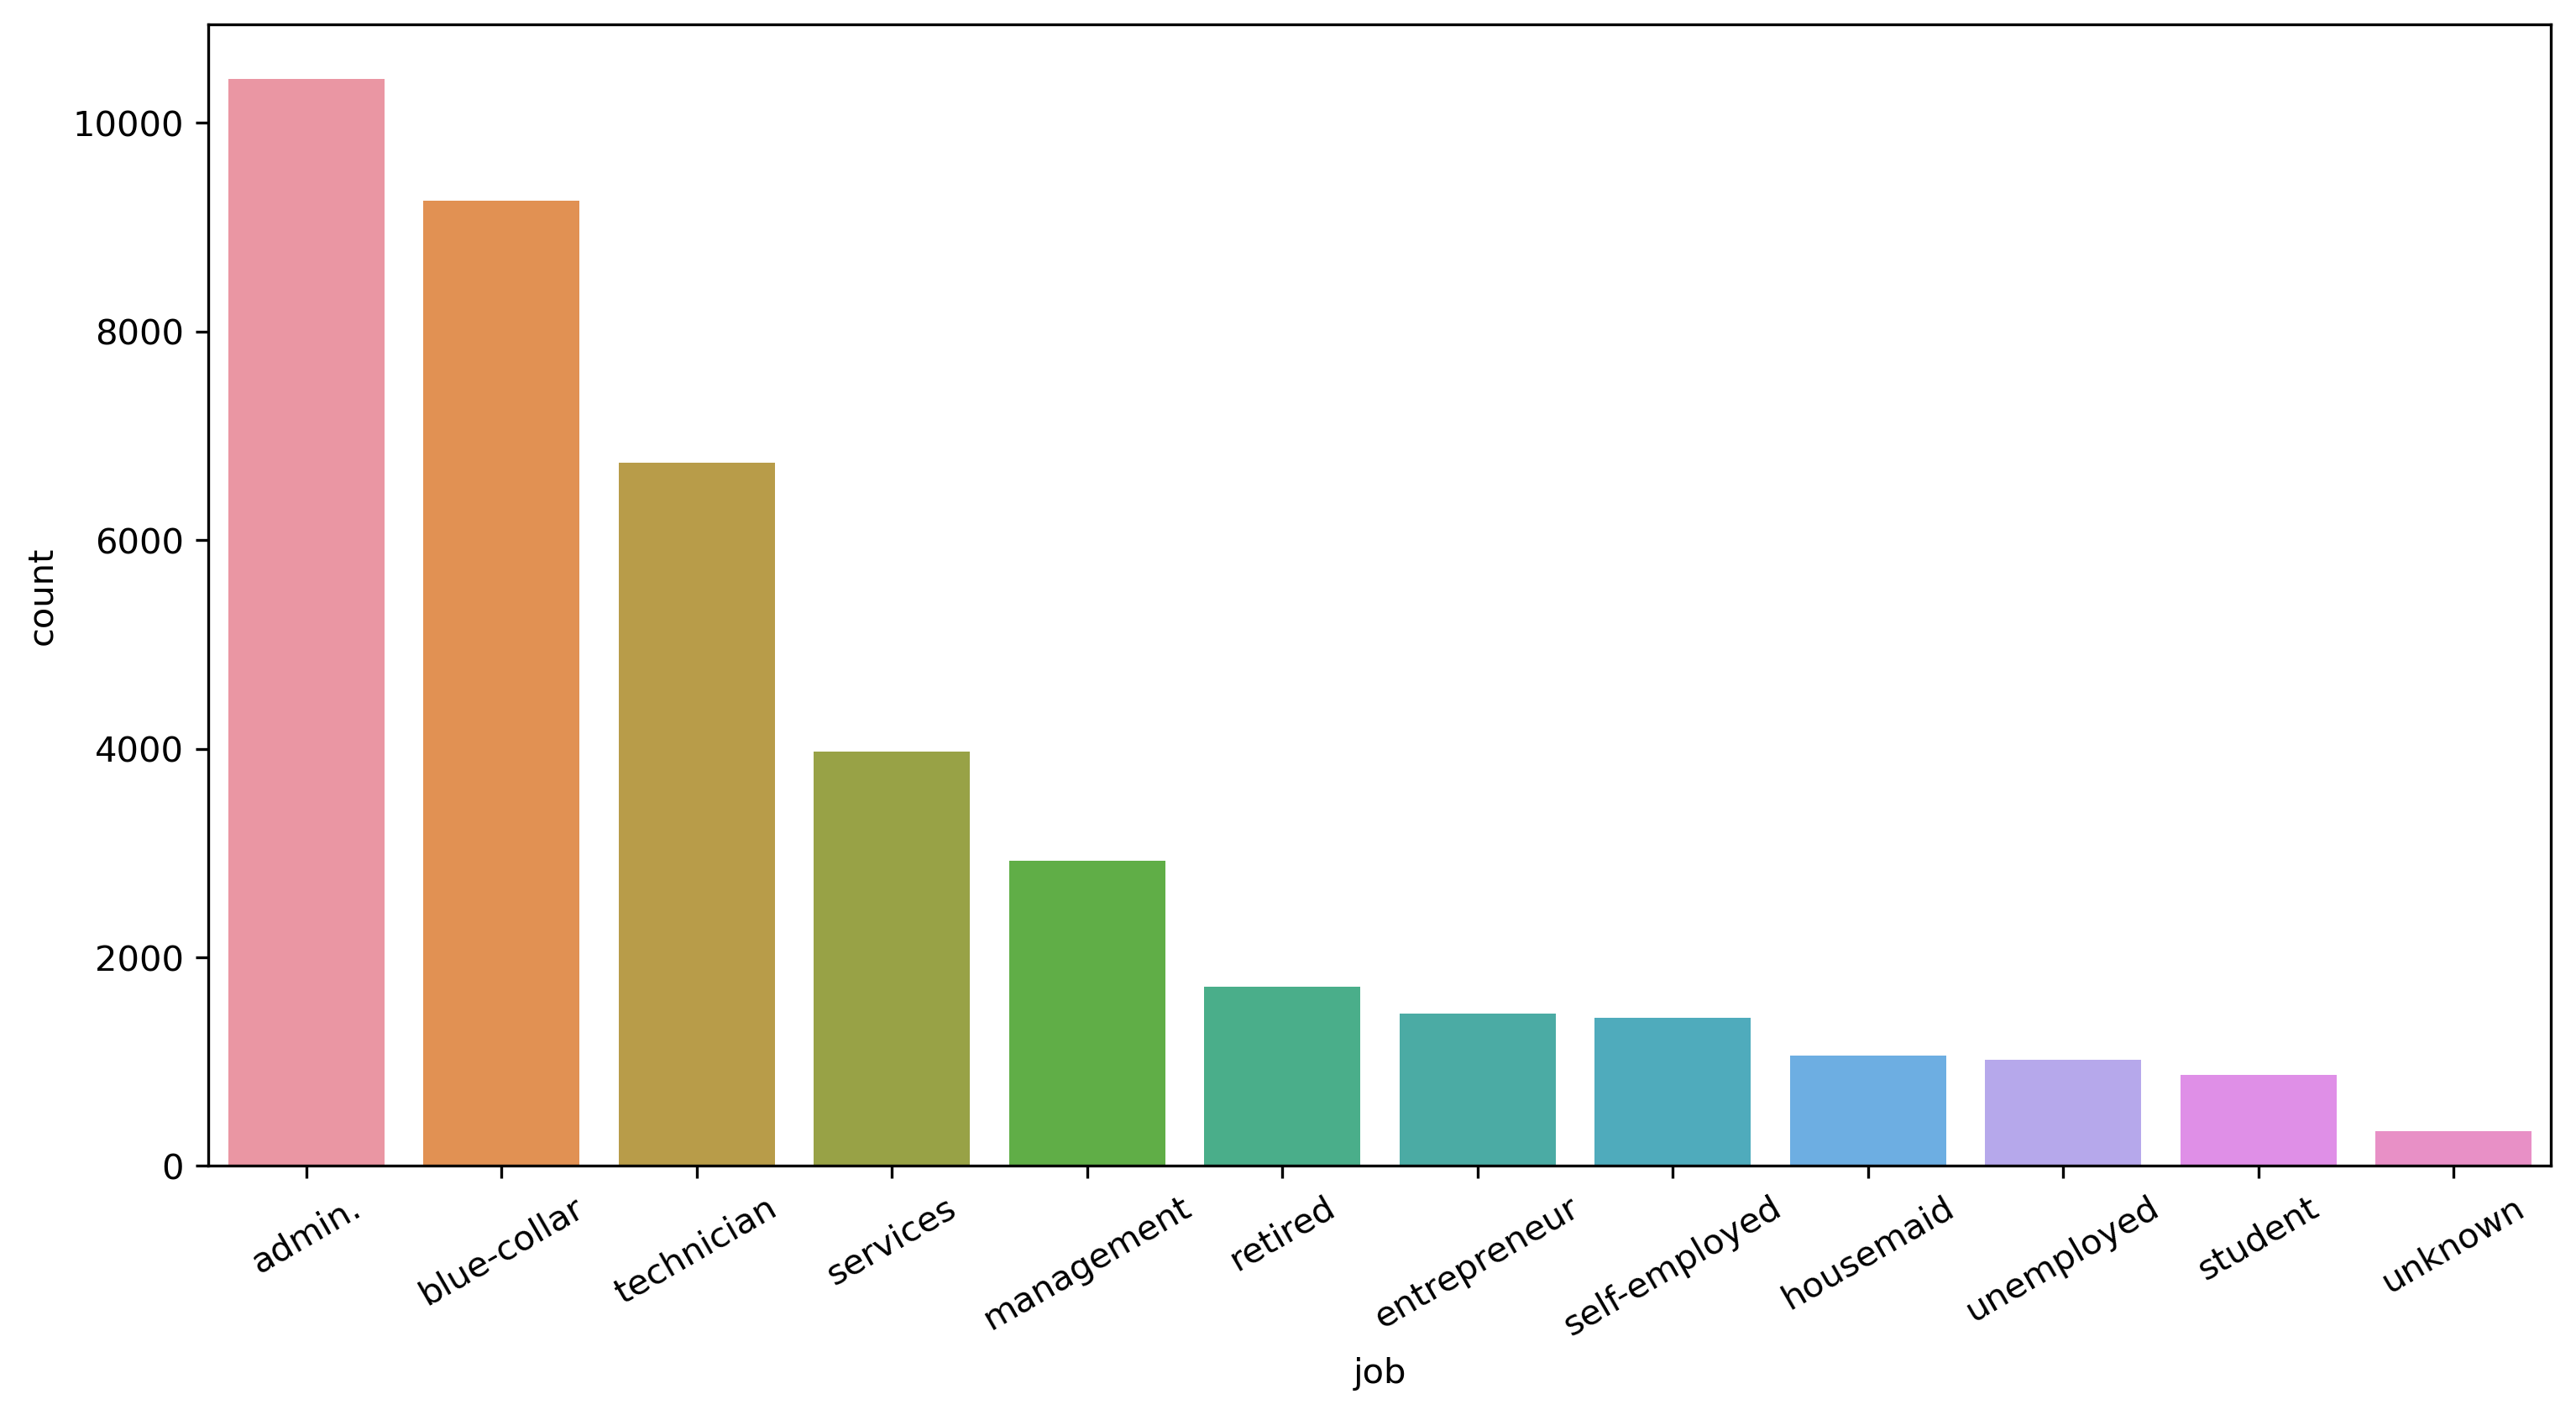

In [22]:
plt.figure(figsize=(12,6),dpi=300)
sns.countplot(data=df,x='job',order=df['job'].value_counts().index)
plt.xticks(rotation=30);

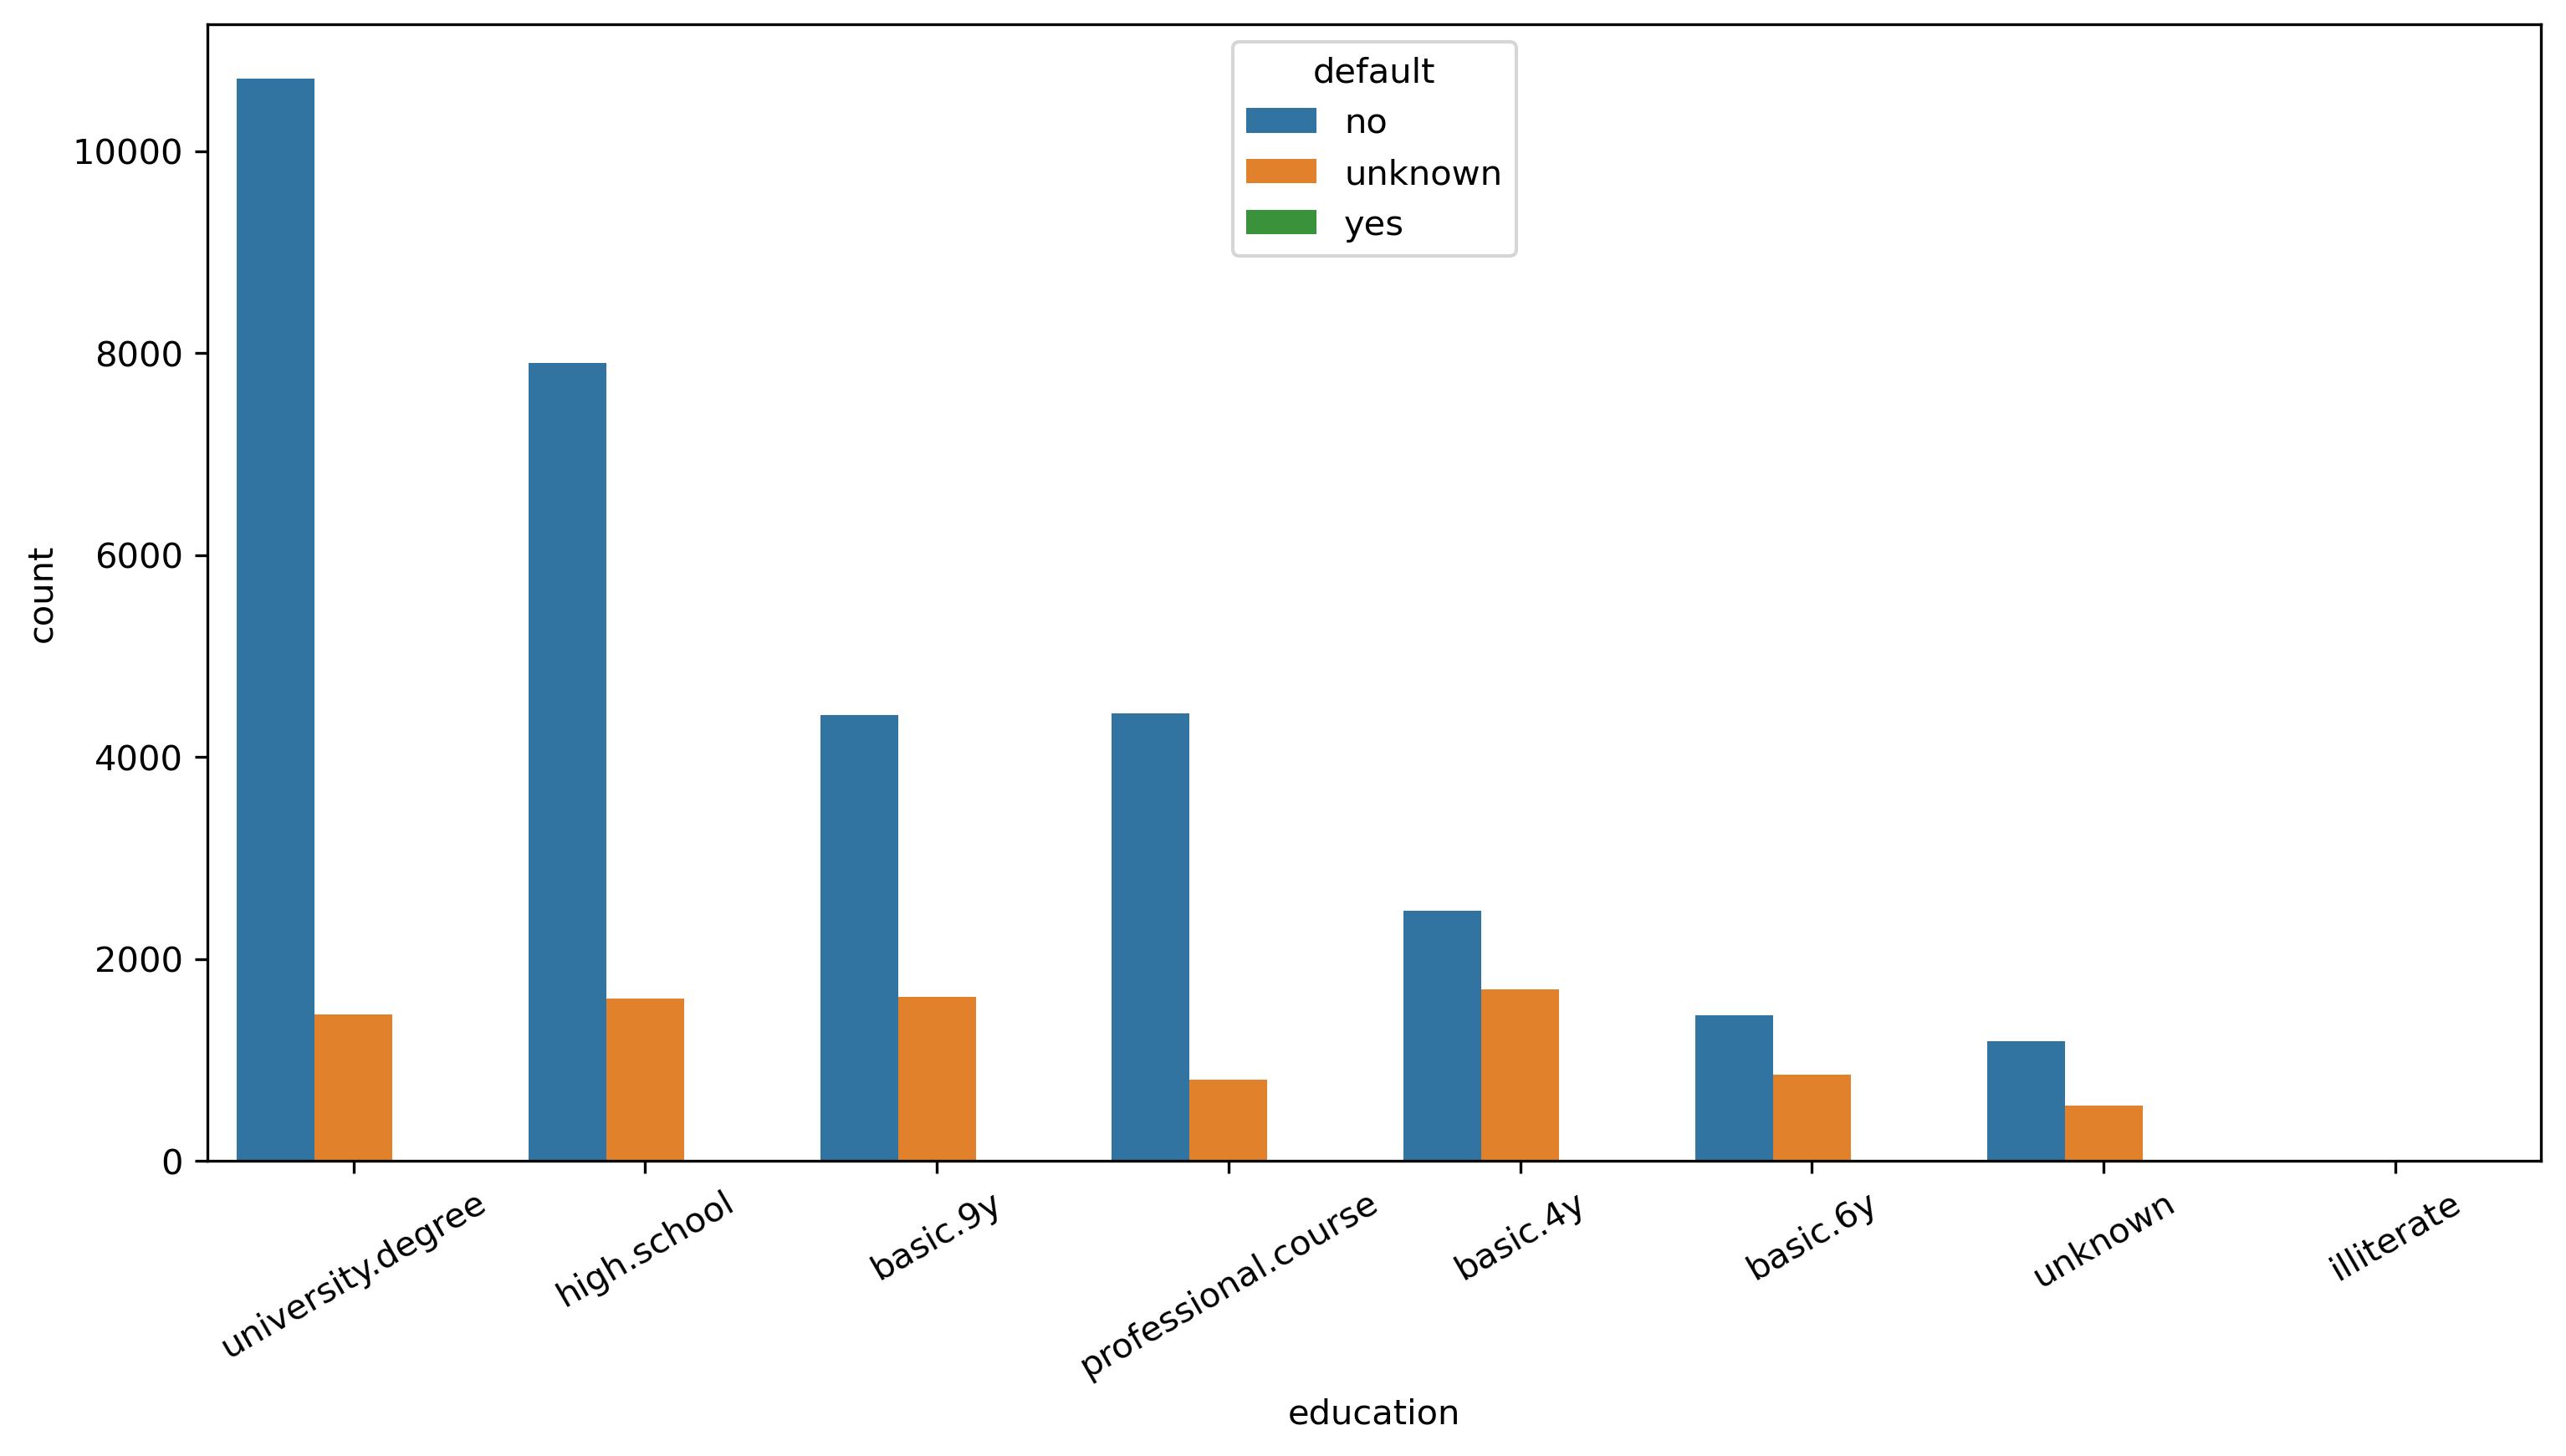

In [25]:
plt.figure(figsize=(12,6),dpi=300)
sns.countplot(data=df,x='education',order=df['education'].value_counts().index,hue='default')
plt.xticks(rotation=30);

In [27]:
x = pd.get_dummies(df)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
cluster_labels = model.fit_predict(scaled_x)
x['cluster'] = cluster_labels

<AxesSubplot:>

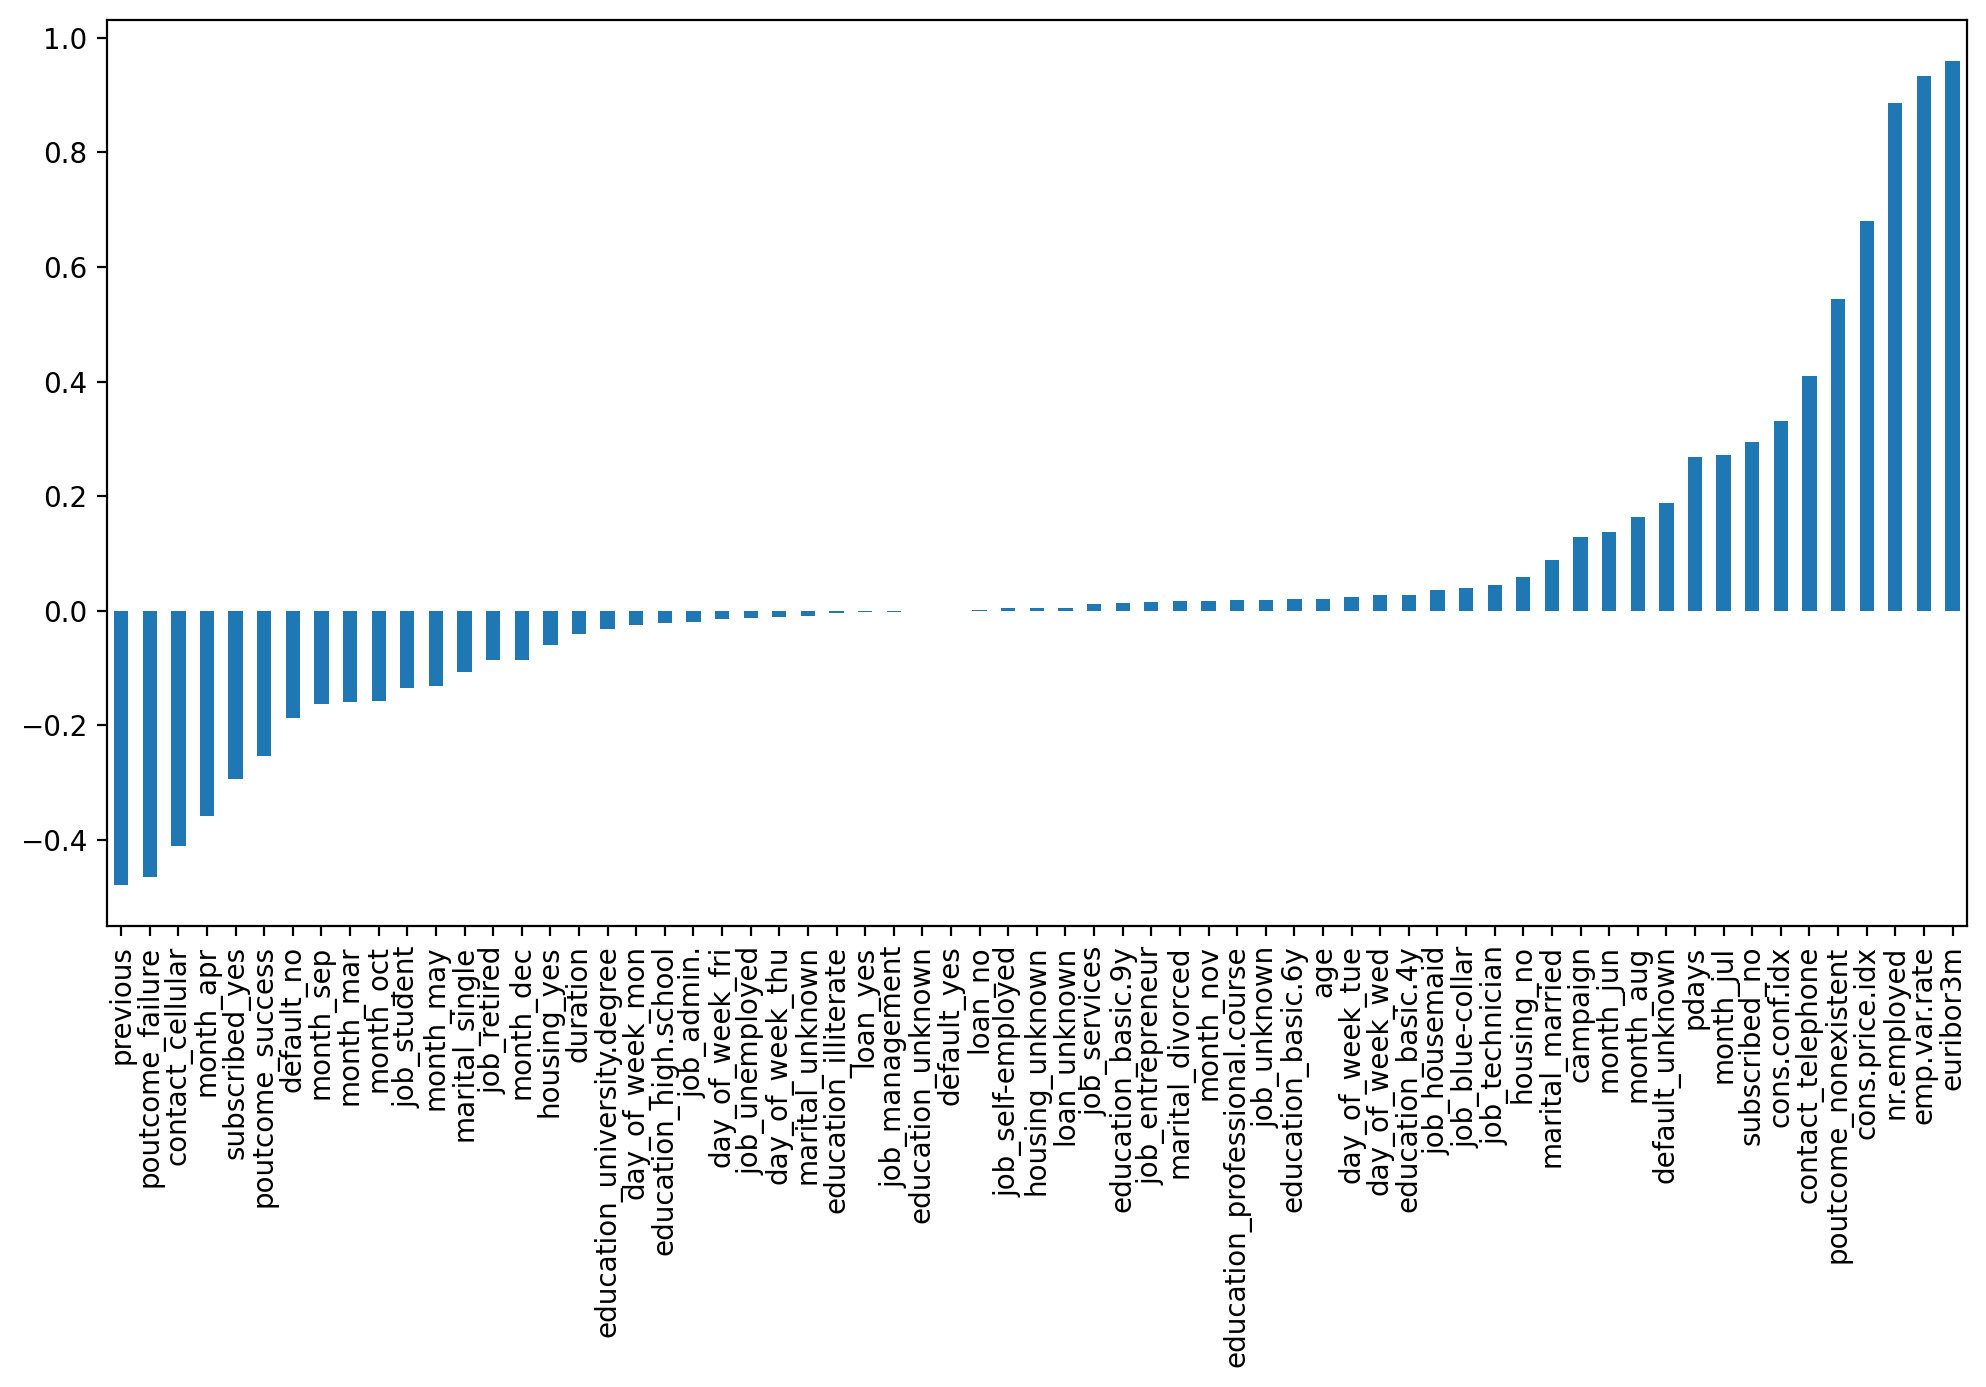

In [34]:
plt.figure(figsize=(12,6),dpi=200)
x.corr()['cluster'].iloc[:-1].sort_values().plot(kind='bar')

In [42]:
ssd = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_x)
    
    ssd.append(model.inertia_)

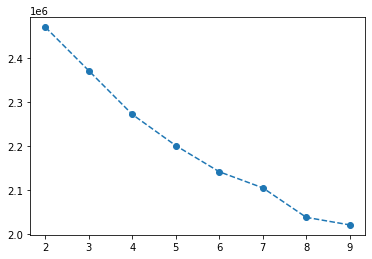

In [43]:
plt.plot(range(2,10),ssd,'o--')

In [44]:
pd.Series(ssd).diff()

0             NaN
1   -99005.938909
2   -99283.453875
3   -70808.942393
4   -59355.209065
5   -36573.379027
6   -67031.918920
7   -17177.785635
dtype: float64